In [1]:
import os
import sys

import pandas as pd
import numpy as np
from collections import defaultdict

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.operation_helpers import  BASE_FUNCTIONS
from src.utils.c_operation_helpers import run_simulation
from figure_settings.settings import * 

In [2]:
# rsync -zaP burrow:multi-reactive_rankings/higher_order_ranking/exp/ex02/data ~/senior_thesis/higher_order_ranking/exp/ex02/

In [3]:
EPOCHS = 250

### Synthetic Data

In [5]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')
filein_idx = os.path.join(data_dir, 'N-1000_M-1000_K-4_L-0_epoch-0_nodes.txt')
filein_data = os.path.join(data_dir, 'N-1000_M-1000_K-4_L-0_epoch-0_edges.txt')

# Result storage
results = {model: {train_size: []  for train_size in np.logspace(-1, 0, endpoint=False, num=15)} for model in BASE_FUNCTIONS}

train_sizes = np.logspace(-1, 0, endpoint=False, num=15)

for train_size_idx, train_size in enumerate(train_sizes):
    print(f"Processing train size: {train_size}")

    for epoch in range(EPOCHS):
        # Simulate and store results
        df = run_simulation(filein_idx, filein_data, train_size)

        # Store each epoch's log-likelihood values without averaging
        for model in df['model'].unique():
            likelihood = float(df[df['model'] == model]['log-likelihood'].values[0])
            results[model][train_size].append(likelihood)

Processing train size: 0.09999999999999999
Processing train size: 0.11659144011798317
Processing train size: 0.13593563908785253
Processing train size: 0.15848931924611132
Processing train size: 0.18478497974222907
Processing train size: 0.21544346900318834
Processing train size: 0.251188643150958
Processing train size: 0.2928644564625236
Processing train size: 0.34145488738336016
Processing train size: 0.3981071705534972
Processing train size: 0.46415888336127786
Processing train size: 0.5411695265464636
Processing train size: 0.6309573444801932
Processing train size: 0.7356422544596414
Processing train size: 0.8576958985908941


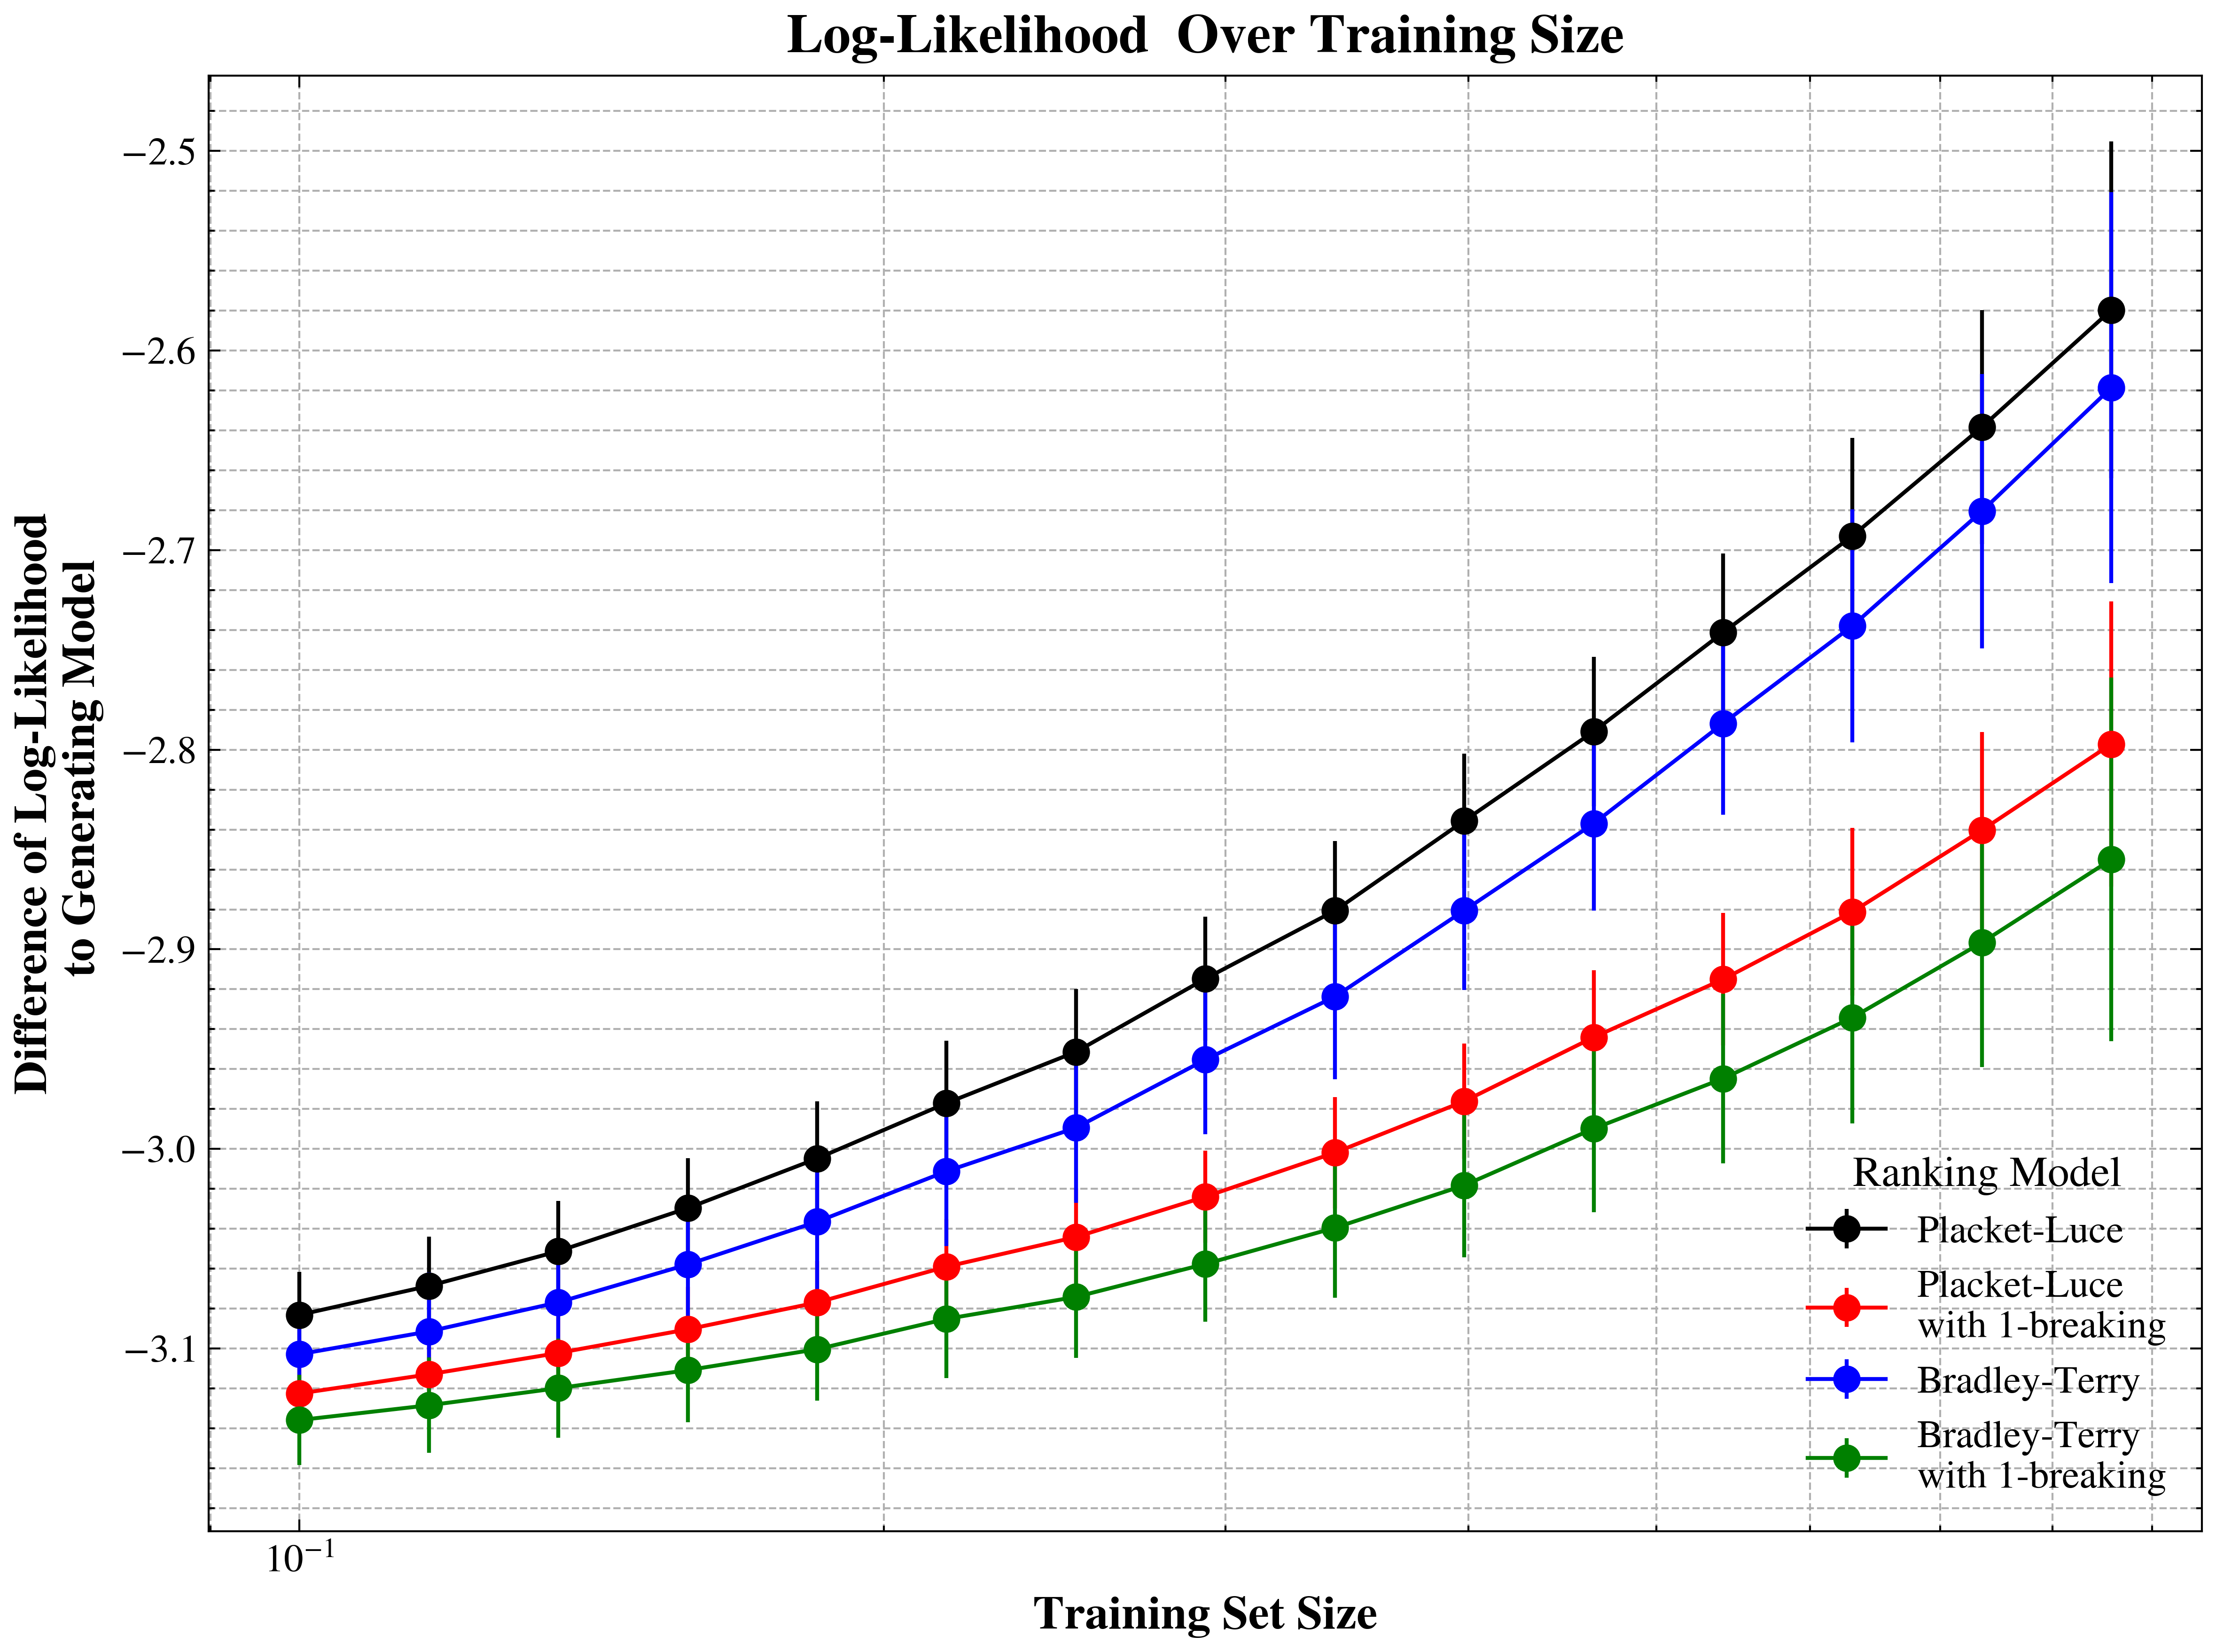

In [10]:
labels = {
    "BIN": "Bradley-Terry",
    "BINL": "Bradley-Terry\nwith 1-breaking",
    "HO_BT": "Placket-Luce",
    "HOL_BT": "Placket-Luce\nwith 1-breaking"
}

# Prepare the figure
plt.figure(figsize=(8, 6))  # Adjusted for a wider view
plt.title("Log-Likelihood  Over Training Size", fontweight="bold", fontsize=14)

# Plot data for each model
for model in BASE_FUNCTIONS:
    model_results = results[model]
    train_sizes = sorted(model_results.keys())
    
    # Extract mean and standard deviation
    means = [np.mean(model_results[x]) for x in train_sizes] 
    stds = [np.std(model_results[x]) for x in train_sizes] 
    
    # Plot with error bars
    plt.errorbar(
        x=train_sizes,
        y=means,
        yerr=stds,
        label=labels.get(model),
        linestyle='-',  # Line style for better distinction
        marker='o',     # Markers for data points
        markersize=6    # Adjust marker size for clarity
    )

# Set x-axis to logarithmic scale
plt.xscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add labels and legend
plt.xlabel("Training Set Size", fontweight="bold", fontsize=12)
plt.ylabel("Difference of Log-Likelihood\n      to Generating Model", fontweight="bold", fontsize=12)
plt.legend(
    title="Ranking Model",
    title_fontsize=11,
    fontsize=10,
    loc="lower right",
    ncol=1,  # Use single-column for better fit
    bbox_to_anchor=(1.0, 0.0)  # Adjust position slightly
)

# Adjust layout and display
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.tight_layout()
plt.show()


### Real Data

In [14]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')

filein_idx = os.path.join(data_dir, '00002_nodes.txt')
filein_data = os.path.join(data_dir, '00002_edges.txt')


results = {model: {train_size: []  for train_size in np.logspace(-1, 0, endpoint=False, num=15)} for model in BASE_FUNCTIONS}

train_sizes = np.logspace(-1, 0, endpoint=False, num=15)

for train_size_idx, train_size in enumerate(train_sizes):
    print(f"Processing train size: {train_size}")

    for epoch in range(EPOCHS):
        # Simulate and store results
        df = run_simulation(filein_idx, filein_data, train_size)

        # Store each epoch's log-likelihood values without averaging
        for model in df['model'].unique():
            likelihood = float(df[df['model'] == model]['log-likelihood'].values[0])
            results[model][train_size].append(likelihood)

Processing train size: 0.09999999999999999
Processing train size: 0.11659144011798317
Processing train size: 0.13593563908785253
Processing train size: 0.15848931924611132
Processing train size: 0.18478497974222907
Processing train size: 0.21544346900318834
Processing train size: 0.251188643150958
Processing train size: 0.2928644564625236
Processing train size: 0.34145488738336016
Processing train size: 0.3981071705534972
Processing train size: 0.46415888336127786
Processing train size: 0.5411695265464636
Processing train size: 0.6309573444801932
Processing train size: 0.7356422544596414
Processing train size: 0.8576958985908941


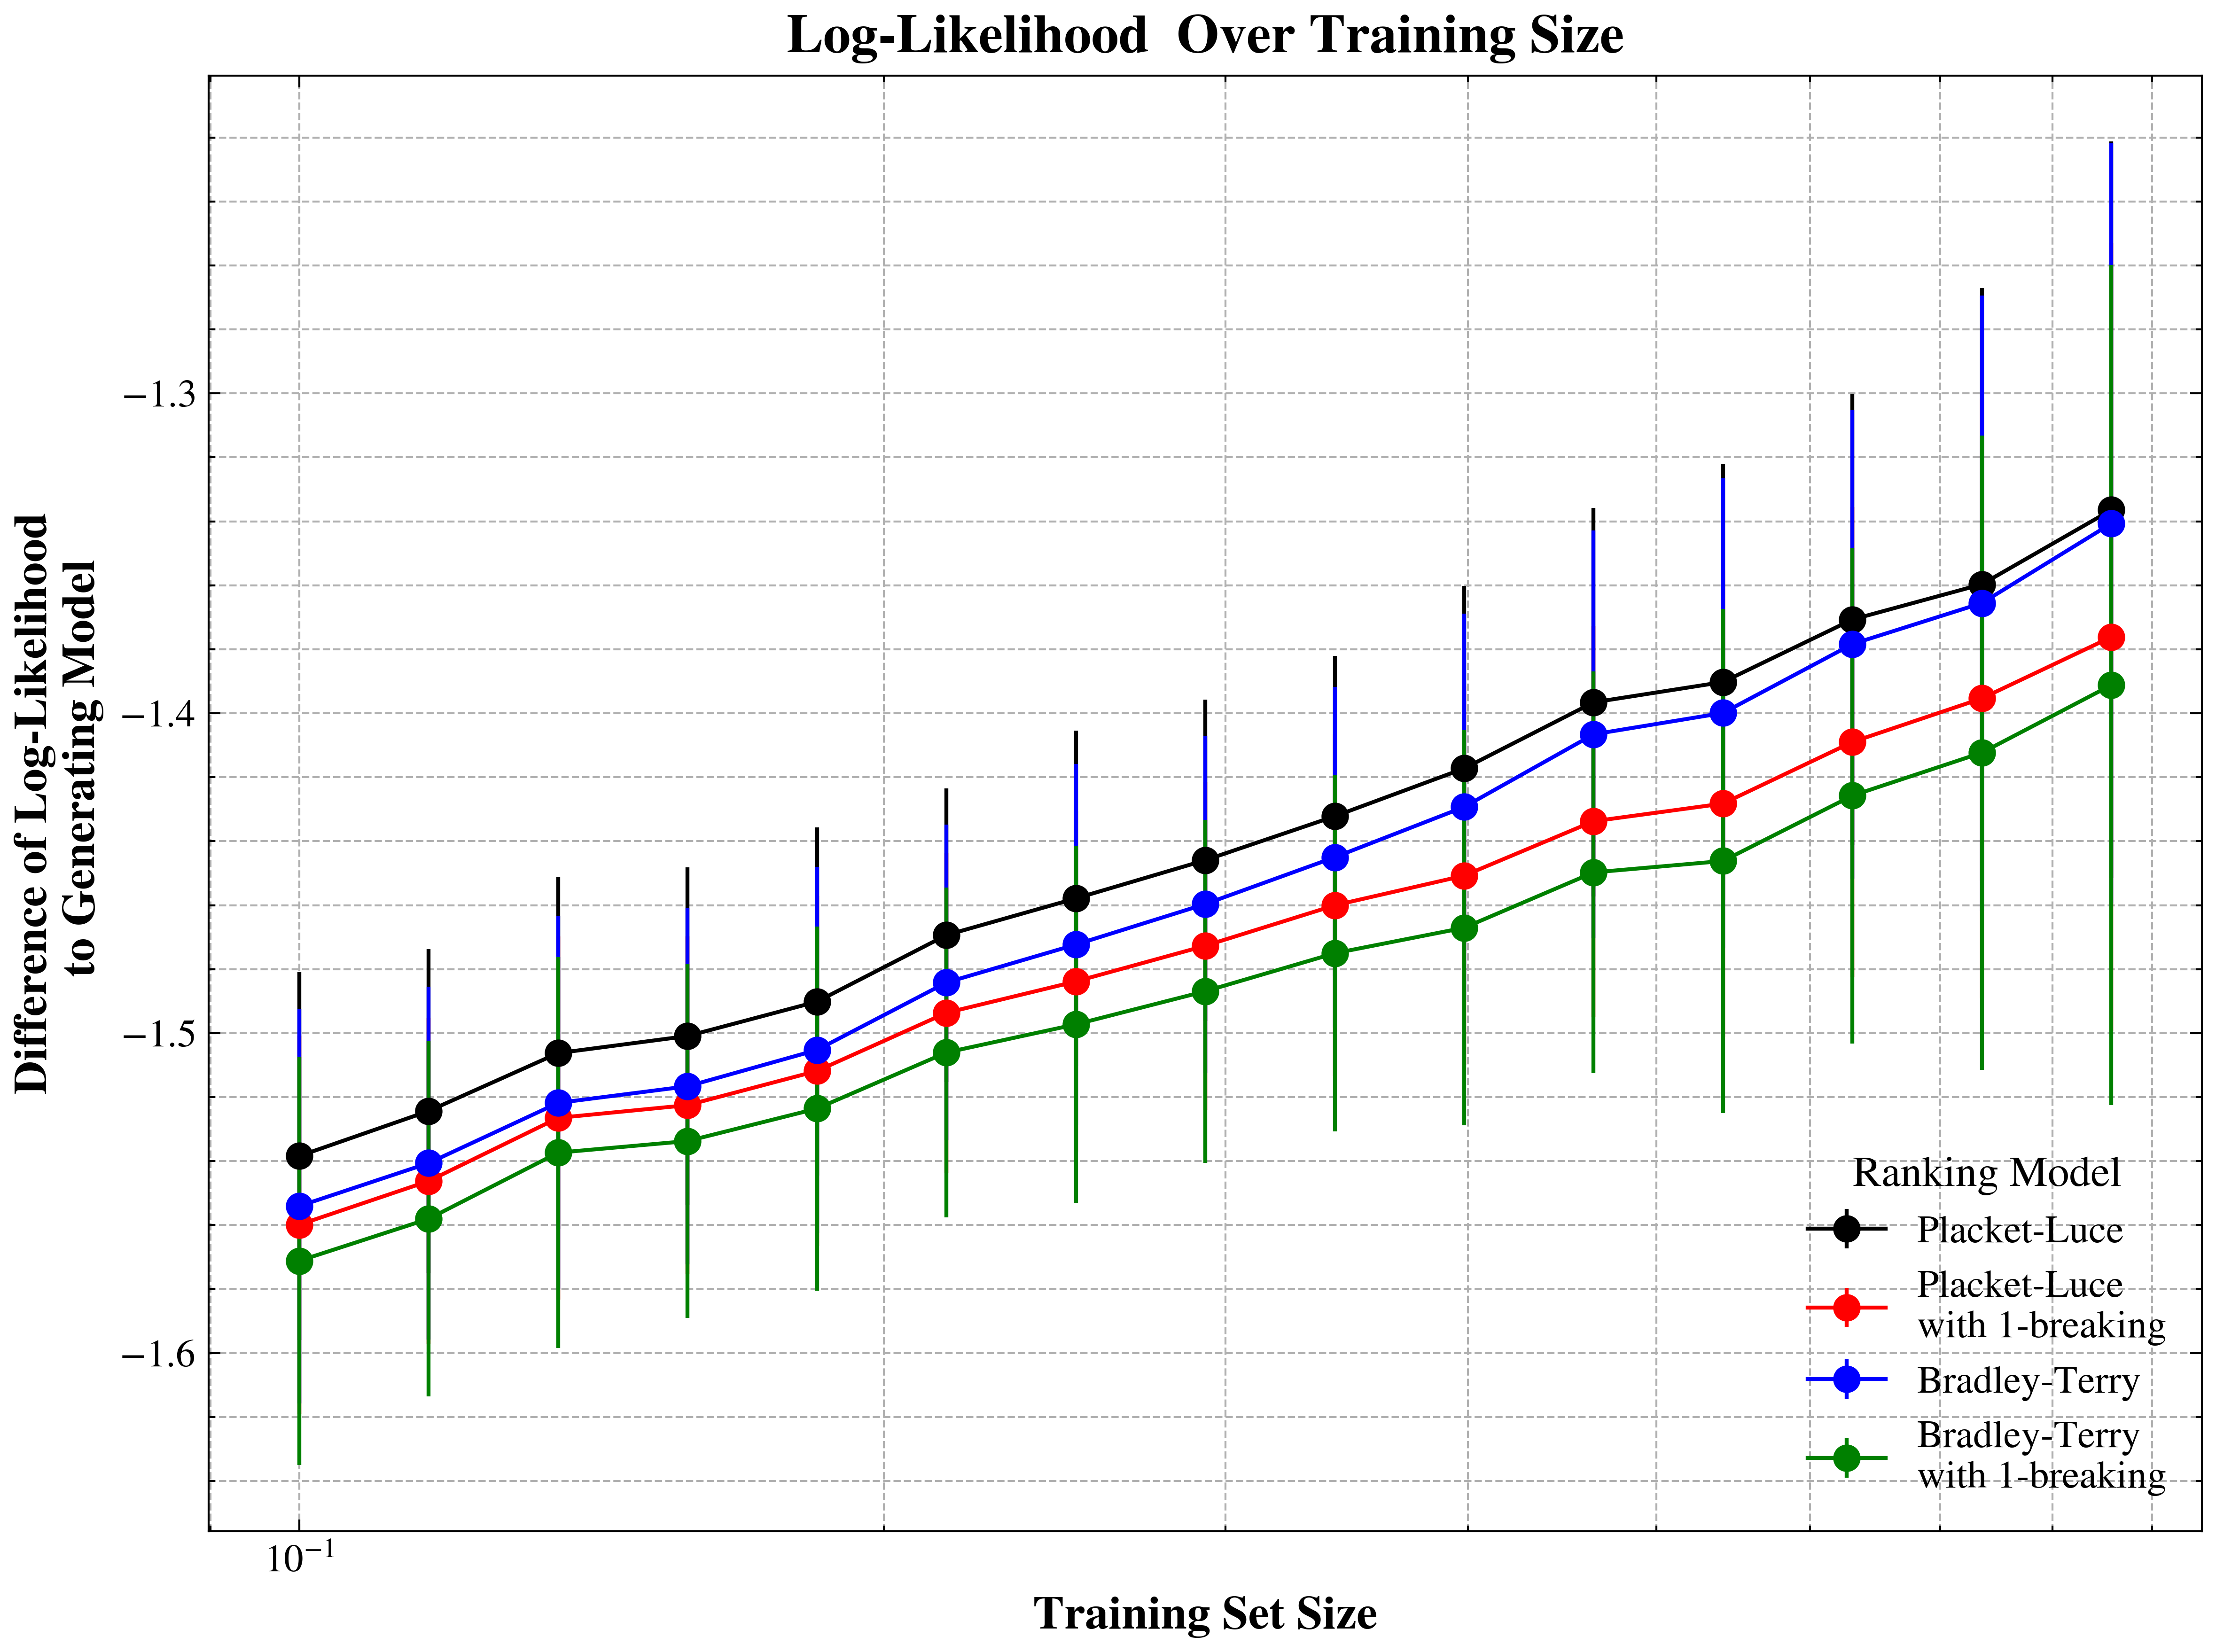

In [20]:
labels = {
    "BIN": "Bradley-Terry",
    "BINL": "Bradley-Terry\nwith 1-breaking",
    "HO_BT": "Placket-Luce",
    "HOL_BT": "Placket-Luce\nwith 1-breaking"
}

# Prepare the figure
plt.figure(figsize=(8, 6))  # Adjusted for a wider view
plt.title("Log-Likelihood  Over Training Size", fontweight="bold", fontsize=14)

# Plot data for each model
for model in BASE_FUNCTIONS:
    model_results = results[model]
    train_sizes = sorted(model_results.keys())
    
    # Extract mean and standard deviation
    means = [np.mean(model_results[x]) for x in train_sizes] 
    stds = [np.std(model_results[x]) for x in train_sizes] 
    
    # Plot with error bars
    plt.errorbar(
        x=train_sizes,
        y=means,
        yerr=stds,
        label=labels.get(model),
        linestyle='-',  # Line style for better distinction
        marker='o',     # Markers for data points
        markersize=6    # Adjust marker size for clarity
    )

# Set x-axis to logarithmic scale
plt.xscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add labels and legend
plt.xlabel("Training Set Size", fontweight="bold", fontsize=12)
plt.ylabel("Difference of Log-Likelihood\n      to Generating Model", fontweight="bold", fontsize=12)
plt.legend(
    title="Ranking Model",
    title_fontsize=11,
    fontsize=10,
    loc="lower right",
    ncol=1,  # Use single-column for better fit
    bbox_to_anchor=(1.0, 0.0)  # Adjust position slightly
)

# Adjust layout and display
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.tight_layout()
plt.show()